In [1]:
from pathlib import Path

file_path = Path("/home/gab/dicom_samples/study1/study1_1/study1_1_1/study1_1_1img1.dcm")

# Verifica se o arquivo existe
if file_path.is_file():
    print(f"Arquivo encontrado: {file_path}")
else:
    print(f"Arquivo não encontrado: {file_path}")


Arquivo encontrado: /home/gab/dicom_samples/study1/study1_1/study1_1_1/study1_1_1img1.dcm


In [2]:
pip install requests pydicom


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests

# Caminho para o arquivo DICOM
dicom_file = "/home/gab/dicom_samples/study1/study1_1/study1_1_1/study1_1_1img1.dcm"

# URL do Orthanc local
url = "http://localhost:8042/instances"

# Headers necessários
headers = {
    "Content-Type": "application/dicom"
}

# Ler e enviar o arquivo DICOM
with open(dicom_file, 'rb') as f:
    response = requests.post(url, headers=headers, data=f)
    if response.status_code == 200:
        print(f"Arquivo {dicom_file} enviado com sucesso!")
    else:
        print(f"Erro ao enviar o arquivo: {response.status_code}")

Erro ao enviar o arquivo: 401


In [4]:
import requests

# Caminho para o arquivo DICOM
dicom_file = "/home/gab/dicom_samples/study1/study1_1/study1_1_1/study1_1_1img1.dcm"

# URL do Orthanc local
url = "http://localhost:8042/instances"

# Headers necessários
headers = {
    "Content-Type": "application/dicom"
}

# Nome de usuário e senha do Orthanc
username = "orthanc"
password = "orthanc"

# Ler e enviar o arquivo DICOM com autenticação
with open(dicom_file, 'rb') as f:
    response = requests.post(url, headers=headers, data=f, auth=(username, password))
    if response.status_code == 200:
        print(f"Arquivo {dicom_file} enviado com sucesso!")
    else:
        print(f"Erro ao enviar o arquivo: {response.status_code}")


Arquivo /home/gab/dicom_samples/study1/study1_1/study1_1_1/study1_1_1img1.dcm enviado com sucesso!


In [5]:
import requests

# Caminho para o arquivo DICOM
dicom_file = "/home/gab/dicom_samples/id_0a1a38c4-c9e03c76-28a14f88-2d30e1d4-6183d46b/Study_79148372.32343444.40535568.71230168.45973202/Series_35159210.86362984.56224315.14980009.77443886/image-75545339-55870039-51885816-92064157-98378507.dcm"

# URL do Orthanc local
url = "http://localhost:8042/instances"

# Headers necessários
headers = {
    "Content-Type": "application/dicom"
}

# Nome de usuário e senha do Orthanc
username = "orthanc"
password = "orthanc"

# Ler e enviar o arquivo DICOM com autenticação
with open(dicom_file, 'rb') as f:
    response = requests.post(url, headers=headers, data=f, auth=(username, password))
    if response.status_code == 200:
        print(f"Arquivo {dicom_file} enviado com sucesso!")
    else:
        print(f"Erro ao enviar o arquivo: {response.status_code}")


Arquivo /home/gab/dicom_samples/id_0a1a38c4-c9e03c76-28a14f88-2d30e1d4-6183d46b/Study_79148372.32343444.40535568.71230168.45973202/Series_35159210.86362984.56224315.14980009.77443886/image-75545339-55870039-51885816-92064157-98378507.dcm enviado com sucesso!


In [6]:
pip install torchxrayvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


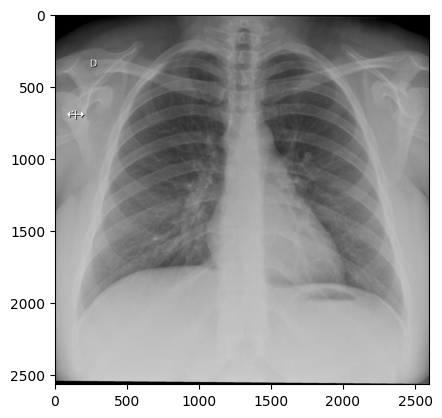

If this fails you can run `wget https://github.com/mlmed/torchxrayvision/releases/download/v1/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt -O /home/gab/.torchxrayvision/models_data/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt`
[██████████████████████████████████████████████████]
Atelectasis: 0.5222739577293396
Consolidation: 0.229399636387825
Infiltration: 0.49659833312034607
Pneumothorax: 0.1289217323064804
Edema: 0.2149377316236496
Emphysema: 0.5123358964920044
Fibrosis: 0.11297295242547989
Effusion: 0.22416357696056366
Pneumonia: 0.5836261510848999
Pleural_Thickening: 0.5165842771530151
Cardiomegaly: 0.4366244077682495
Nodule: 0.4428308606147766
Mass: 0.12743045389652252
Hernia: 0.21528548002243042
Lung Lesion: 0.28253746032714844
Fracture: 0.50003582239151
Lung Opacity: 0.6153361201286316
Enlarged Cardiomediastinum: 0.5159304141998291


In [8]:
import torchxrayvision as xrv
import pydicom
import numpy as np
import torch
import matplotlib.pyplot as plt

# Carregar o arquivo DICOM
dicom_file = "/home/gab/dicom_samples/study1/study1_1/study1_1_1/study1_1_1img1.dcm"
dicom_data = pydicom.dcmread(dicom_file)

# Extrair a imagem do arquivo DICOM
img = dicom_data.pixel_array

# Normalizar a imagem (0 a 1)
img = img.astype(np.float32)
img /= img.max()

# Mostrar a imagem para verificar se foi carregada corretamente
plt.imshow(img, cmap='gray')
plt.show()

# Redimensionar a imagem para o formato esperado pelo modelo (224x224)
img_resized = xrv.datasets.normalize(img, 224)

# Converter a imagem para tensor
img_tensor = torch.from_numpy(img_resized).unsqueeze(0).unsqueeze(0).float()

# Carregar o modelo pré-treinado
model = xrv.models.DenseNet(weights="densenet121-res224-all")

# Fazer a classificação
output = model(img_tensor)

# Mapear os resultados para as classes conhecidas
for i, value in enumerate(output[0]):
    print(f"{model.pathologies[i]}: {value.item()}")


In [9]:
import json

results = {model.pathologies[i]: output[0][i].item() for i in range(len(model.pathologies))}

# Salvar os resultados em formato JSON
with open("resultados.json", "w") as f:
    json.dump(results, f)
